# Get EOTest Results

Accessing and plotting eotest results.

Installation: 

git clone https://github.com/lsst-camera-dh/datacat-utilities.git 
cd datacat-utilities 
git checkout python3 

git clone https://github.com/lsst-camera-dh/eTraveler-clientAPI.git


edit $HOME/notebooks/.user_setups with:

export PYTHONPATH=$PYTHONPATH:/path/to/eTraveler-clientAPI/python

export PYTHONPATH=$PYTHONPATH:/path/to/datacat-utilities


Restart your kernel. 

In [97]:
!pwd

/home/elp25/bootcamp-work/examples


In [5]:
from get_EO_analysis_results import get_EO_analysis_results
from exploreFocalPlane import exploreFocalPlane
from exploreRaft import exploreRaft
from eTraveler.clientAPI.connection import Connection

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Examples

All test results options: 
[('Gain', 'gain'), ('Gain Error', 'gain_error'), ('PSF', 'psf_sigma'),
                     ("Read Noise", 'read_noise'), ('System Noise', 'system_noise'),
                     ('Total Noise', 'total_noise'), ('Bright Pixels', 'bright_pixels'),
                     ('Bright Columns', 'bright_columns'), ('Dark Pixels', 'dark_pixels'),
                     ('Dark Columns', 'dark_columns'), ("Traps", 'num_traps'),
                     ('CTI Low Serial', 'cti_low_serial'), ('CTI High Serial', 'cti_high_serial'),
                     ('CTI Low Parallel', 'cti_low_parallel'), ('CTI High Parallel', 'cti_high_parallel'),
                     ('Dark Current 95CL', 'dark_current_95CL'),
                     ('PTC gain', 'ptc_gain'), ('Pixel mean', 'pixel_mean'), ('Full Well', 'full_well'),
                     ('Nonlinearity', 'max_frac_dev')]

In [92]:
g = get_EO_analysis_results(db='Dev')   # initialize (all Prod by default"
raft_list, data = g.get_tests(site_type="I&T-Raft", test_type="bright_columns", run ='5943D')  # get the data for I&T-Raft
res = g.get_results(test_type='bright_columns', data=data, device=raft_list[0])  # get the data for a raft

Now Compare to DM Results

In [78]:
fe55_dm = np.load('/home/elp25/bootcamp-work/examples/fe55_gains.npy')

In [79]:
ccd_names = [key for key in res.keys()]
ccd_names[0]

'ITL-3800C-083-Dev'

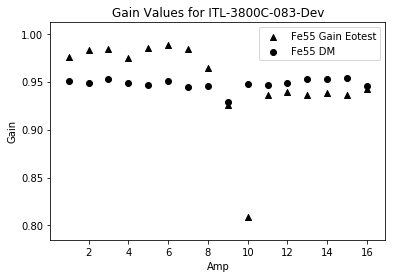

In [89]:
plt.scatter([i for i in range(1,17)],res[ccd_names[8]],color='black',label='Fe55 Gain Eotest',marker='^')
#plt.scatter([i for i in range(1,17)],res_ptc[ccd_name],color='purple',label='PTC Gain Eotest',marker='^')
plt.scatter([i for i in range(1,17)],fe55_dm,color='black', label='Fe55 DM')
plt.ylabel('Gain')
plt.xlabel('Amp')
plt.title('Gain Values for '+ccd_name)
plt.legend()